In [1]:
import xgboost as xgb
from matplotlib import pyplot, figure
from xgboost import XGBClassifier, plot_importance
from pandas import read_csv
from keras.losses import mean_squared_error
from sklearn.model_selection import train_test_split
from numpy import sqrt

Using TensorFlow backend.


In [2]:
df = read_csv('ucsbdata.csv')
df.fillna(0, inplace=True)
initial_start = '2008-08-30'

dataset = df.loc[df.Index > initial_start]
x, y = dataset.drop(['R', 'Index'], axis = 1), dataset.R

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 123)

xgb.DMatrix(x_train, y_train)

In [15]:
xgb_model = xgb.XGBRegressor(#base_score=0.5, 
                             #booster='gbtree', 
                             colsample_bylevel=1,
                             colsample_bynode=1, 
                             colsample_bytree=1, 
                             gamma=0,
                             importance_type='gain', 
                             learning_rate=0.1, 
                             max_delta_step=0,
                             #max_depth=3, 
                             min_child_weight=1, 
                             missing=None, 
                             n_estimators=100,
                             n_jobs=1, 
                             nthread=None, 
                             objective='reg:squarederror', 
                             random_state=0,
                             reg_alpha=0, 
                             reg_lambda=1, 
                             scale_pos_weight=1, 
                             seed=None,
                             silent=None, 
                             subsample=1, 
                             verbosity=1)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [16]:
prediction = xgb_model.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, prediction))
rmse

0.009588075

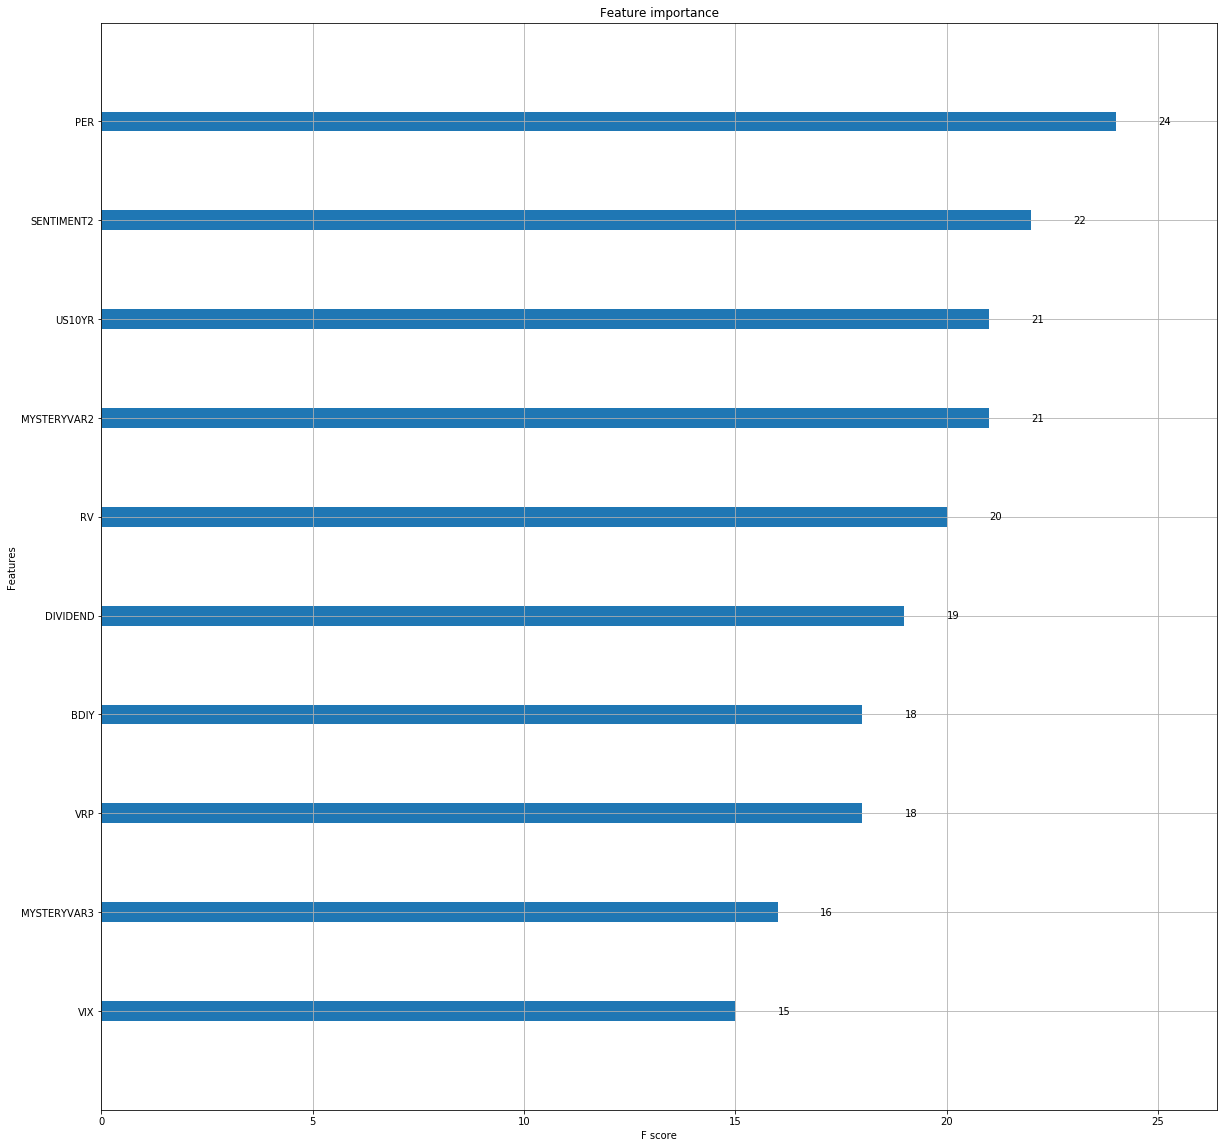

In [17]:
ax = xgb.plot_importance(xgb_model, max_num_features=10)
fig = ax.figure
fig.set_size_inches(20, 20)

In [22]:
example_point = x.iloc[[1]]
actual_point = y.iloc[[1]]

In [24]:
x = xgb_model.predict(example_point)
print('Prediction:', x)
print('Actual Point:', actual_point)

Prediction: [-0.00903529]
Actual Point: 14263   -0.021012
Name: R, dtype: float64


In [ ]:
#Compute R^2 for model